<a href="https://colab.research.google.com/github/jazzathoth/DataStorytelling_ProjectRepo/blob/master/planets_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

In [0]:
# confirmed planets data

planets_conf_url = 'https://github.com/jazzathoth/DataStorytelling_ProjectRepo/raw/master/q1_q17_dr24_koi_2019.04.15_15.49.49.csv'

planets_conf = pd.read_csv(planets_conf_url, comment='#')

print(planets_conf.columns, '\n', planets_conf.shape)

Index(['loc_rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'koi_sage', 'ra', 'dec', 'koi_kepmag'], dtype='object') 
 (2280, 25)


In [0]:
largest20 = planets_conf.sort_values(by='koi_prad', ascending=False).head(20)
smallest20 = planets_conf.sort_values(by='koi_prad').head(20)

In [0]:
# get time series data urls:

q17_urls_url = 'https://raw.githubusercontent.com/jazzathoth/DataStorytelling_ProjectRepo/master/kepler_q17.csv'
q16_urls_url = 'https://raw.githubusercontent.com/jazzathoth/DataStorytelling_ProjectRepo/master/Kepler_Q16.csv'
q15_urls_url = 'https://raw.githubusercontent.com/jazzathoth/DataStorytelling_ProjectRepo/master/Kepler_Q15.csv'
q14_urls_url = 'https://raw.githubusercontent.com/jazzathoth/DataStorytelling_ProjectRepo/master/Kepler_Q14.csv'
q13_urls_url = 'https://raw.githubusercontent.com/jazzathoth/DataStorytelling_ProjectRepo/master/Kepler_Q13.csv'
q12_urls_url = 'https://raw.githubusercontent.com/jazzathoth/DataStorytelling_ProjectRepo/master/Kepler_Q12.csv'


q17_urls = pd.read_csv(q17_urls_url)
q16_urls = pd.read_csv(q16_urls_url)
q15_urls = pd.read_csv(q15_urls_url)
q14_urls = pd.read_csv(q14_urls_url)
q13_urls = pd.read_csv(q13_urls_url)
q12_urls = pd.read_csv(q12_urls_url)

In [0]:
q17_urls.columns = ['kepid', 'lc_url']
q16_urls.columns = ['kepid', 'lc_url']
q15_urls.columns = ['kepid', 'lc_url']
q14_urls.columns = ['kepid', 'lc_url']
q13_urls.columns = ['kepid', 'lc_url']
q12_urls.columns = ['kepid', 'lc_url']

In [0]:
q17_urls = q17_urls[~q17_urls['kepid'].str.contains(".fits")]
q17_urls = q17_urls[~q17_urls['lc_url'].str.contains("_slc_lc.tbl")]
q17_urls['kepid'] =  q17_urls['kepid'].str.replace("'kplr","")

q16_urls = q16_urls[~q16_urls['kepid'].str.contains(".fits")]
q16_urls = q16_urls[~q16_urls['lc_url'].str.contains("_slc_lc.tbl")]
q16_urls['kepid'] =  q16_urls['kepid'].str.replace("'kplr","")

q15_urls = q15_urls[~q15_urls['kepid'].str.contains(".fits")]
q15_urls = q15_urls[~q15_urls['lc_url'].str.contains("_slc_lc.tbl")]
q15_urls['kepid'] =  q15_urls['kepid'].str.replace("'kplr","")

q14_urls = q14_urls[~q14_urls['kepid'].str.contains(".fits")]
q14_urls = q14_urls[~q14_urls['lc_url'].str.contains("_slc_lc.tbl")]
q14_urls['kepid'] =  q14_urls['kepid'].str.replace("'kplr","")

q13_urls = q13_urls[~q13_urls['kepid'].str.contains(".fits")]
q13_urls = q13_urls[~q13_urls['lc_url'].str.contains("_slc_lc.tbl")]
q13_urls['kepid'] =  q13_urls['kepid'].str.replace("'kplr","")

q12_urls = q12_urls[~q12_urls['kepid'].str.contains(".fits")]
q12_urls = q12_urls[~q12_urls['lc_url'].str.contains("_slc_lc.tbl")]
q12_urls['kepid'] =  q12_urls['kepid'].str.replace("'kplr","")

In [0]:
q17_urls['kepid'] = q17_urls['kepid'].str.split('-', 1, expand=True)[0]
q16_urls['kepid'] = q16_urls['kepid'].str.split('-', 1, expand=True)[0]
q15_urls['kepid'] = q15_urls['kepid'].str.split('-', 1, expand=True)[0]
q14_urls['kepid'] = q14_urls['kepid'].str.split('-', 1, expand=True)[0]
q13_urls['kepid'] = q13_urls['kepid'].str.split('-', 1, expand=True)[0]
q12_urls['kepid'] = q12_urls['kepid'].str.split('-', 1, expand=True)[0]

In [0]:
q17_urls['kepid'] = q17_urls['kepid'].astype(int)
q16_urls['kepid'] = q16_urls['kepid'].astype(int)
q15_urls['kepid'] = q15_urls['kepid'].astype(int)
q14_urls['kepid'] = q14_urls['kepid'].astype(int)
q13_urls['kepid'] = q13_urls['kepid'].astype(int)
q12_urls['kepid'] = q12_urls['kepid'].astype(int)


In [0]:


q17_urls.loc[q17_urls['kepid'] == 11018648]['lc_url'].values
q16_urls.loc[q16_urls['kepid'] == 11018648]['lc_url'].values
q15_urls.loc[q15_urls['kepid'] == 11018648]['lc_url'].values
q14_urls.loc[q14_urls['kepid'] == 11018648]['lc_url'].values
q13_urls.loc[q13_urls['kepid'] == 11018648]['lc_url'].values
q12_urls.loc[q12_urls['kepid'] == 11018648]['lc_url'].values


array([], dtype=object)

In [0]:
all_urls = {'q17':q17_urls, 'q16':q16_urls, 'q15':q15_urls, 'q14':q14_urls, 'q13':q13_urls, 'q12':q12_urls}
quarters = ['q17','q16','q15','q14','q13','q12']

In [0]:
for urls in quarters:
  print(urls, all_urls[urls].loc[all_urls[urls]['kepid'] == 10358759].values)

In [0]:
smallest20.sample(10)

In [0]:


def get_lcurls(kepler_id):
  all_urls = {'q17':q17_urls, 'q16':q16_urls, 'q15':q15_urls, 'q14':q14_urls, 'q13':q13_urls, 'q12':q12_urls}
  quarters = ['q17','q16','q15','q14','q13','q12']
  urls_got = []
  for urls in quarters:
    geturl = all_urls[urls].loc[all_urls[urls]['kepid'] == kepler_id]['lc_url'].values.tolist()
    urls_got.append([urls, geturl])
  return(urls_got)

In [0]:
big_planet_urls = get_lcurls(11018648)
little_planet_urls = get_lcurls(7826620	)

In [0]:
little_planet_urls

[['q17',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/702/65/kplr007826620-2013131215648_llc_lc.tbl'"]],
 ['q16',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/669/72/kplr007826620-2013098041711_llc_lc.tbl'"]],
 ['q15',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/636/70/kplr007826620-2013011073258_llc_lc.tbl'"]],
 ['q14',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/602/36/kplr007826620-2012277125453_llc_lc.tbl'"]],
 ['q13',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/569/38/kplr007826620-2012179063303_llc_lc.tbl'"]],
 ['q12',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/536/60/kplr007826620-2012088054726_llc_lc.tbl'"]]]

In [0]:
big_planet_urls


[['q17',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/709/43/kplr011018648-2013131215648_llc_lc.tbl'"]],
 ['q16', []],
 ['q15',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/642/44/kplr011018648-2013011073258_llc_lc.tbl'"]],
 ['q14',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/609/38/kplr011018648-2012277125453_llc_lc.tbl'"]],
 ['q13',
  ["'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/576/03/kplr011018648-2012179063303_llc_lc.tbl'"]],
 ['q12', []]]

In [0]:
# Little planet wgets
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/700/02/kplr006278762-2013131215648_llc_lc.tbl'

In [0]:
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/666/93/kplr006278762-2013098041711_llc_lc.tbl'
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/633/83/kplr006278762-2013011073258_llc_lc.tbl'

In [0]:
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/599/44/kplr006278762-2012277125453_llc_lc.tbl'
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/566/75/kplr006278762-2012179063303_llc_lc.tbl'
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/533/81/kplr006278762-2012088054726_llc_lc.tbl'
 

In [0]:
# Big planet wgets
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/709/43/kplr011018648-2013131215648_llc_lc.tbl'
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/642/44/kplr011018648-2013011073258_llc_lc.tbl'
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/609/38/kplr011018648-2012277125453_llc_lc.tbl'
!wget 'http://exoplanetarchive.ipac.caltech.edu:80/data/ETSS//Kepler/005/576/03/kplr011018648-2012179063303_llc_lc.tbl'


In [0]:
# load light data  csvs for the large planet
bp17light = pd.read_csv('kplr011018648-2013131215648_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
bp15light = pd.read_csv('kplr011018648-2013011073258_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
bp14light = pd.read_csv('kplr011018648-2012277125453_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
bp13light = pd.read_csv('kplr011018648-2012179063303_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')

In [0]:
# load light data for the little planet
lp17light = pd.read_csv('kplr006278762-2013131215648_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
lp16light = pd.read_csv('kplr006278762-2013098041711_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
lp15light = pd.read_csv('kplr006278762-2013011073258_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
lp14light = pd.read_csv('kplr006278762-2012277125453_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
lp13light = pd.read_csv('kplr006278762-2012179063303_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')
lp12light = pd.read_csv('kplr006278762-2012088054726_llc_lc.tbl', comment="\\",sep='\s\s+', skip_blank_lines=True, header=4, engine='python')

In [0]:
bpl_vars = [bp13light,bp14light,bp15light,bp17light]
lpl_vars = [lp12light,lp13light,lp14light,lp15light,lp16light,lp17light]

col_names_for_light_files = ['time', 'time_bjd', 'timecorr', 'cadenceno','sap_flus','sap_flux_err','sap_bkg','sap_bkg_err','pdscap_flux','pdscap_flux_err','sap_quality','psf_centr1',
                    'psf_centr1_err', 'psf_centr2','psf_centr2_err','mom_centr','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2']

In [0]:
bp17light.shape, lp17light.shape

((1555, 21), (1555, 21))

In [0]:
def add_col_heads(head_names, datas):
  for x in datas:
    x.columns = head_names

In [0]:
add_col_heads(col_names_for_light_files, bpl_vars)
add_col_heads(col_names_for_light_files, lpl_vars)


In [0]:
bp17light.columns, lp17light.columns

(Index(['time', 'time_bjd', 'timecorr', 'cadenceno', 'sap_flus', 'sap_flux_err', 'sap_bkg', 'sap_bkg_err', 'pdscap_flux', 'pdscap_flux_err', 'sap_quality', 'psf_centr1', 'psf_centr1_err', 'psf_centr2', 'psf_centr2_err', 'mom_centr', 'mom_centr1_err', 'mom_centr2', 'mom_centr2_err', 'pos_corr1', 'pos_corr2'], dtype='object'),
 Index(['time', 'time_bjd', 'timecorr', 'cadenceno', 'sap_flus', 'sap_flux_err', 'sap_bkg', 'sap_bkg_err', 'pdscap_flux', 'pdscap_flux_err', 'sap_quality', 'psf_centr1', 'psf_centr1_err', 'psf_centr2', 'psf_centr2_err', 'mom_centr', 'mom_centr1_err', 'mom_centr2', 'mom_centr2_err', 'pos_corr1', 'pos_corr2'], dtype='object'))

Text(0, 0.5, 'Size of the star it orbits compared to our Sun')

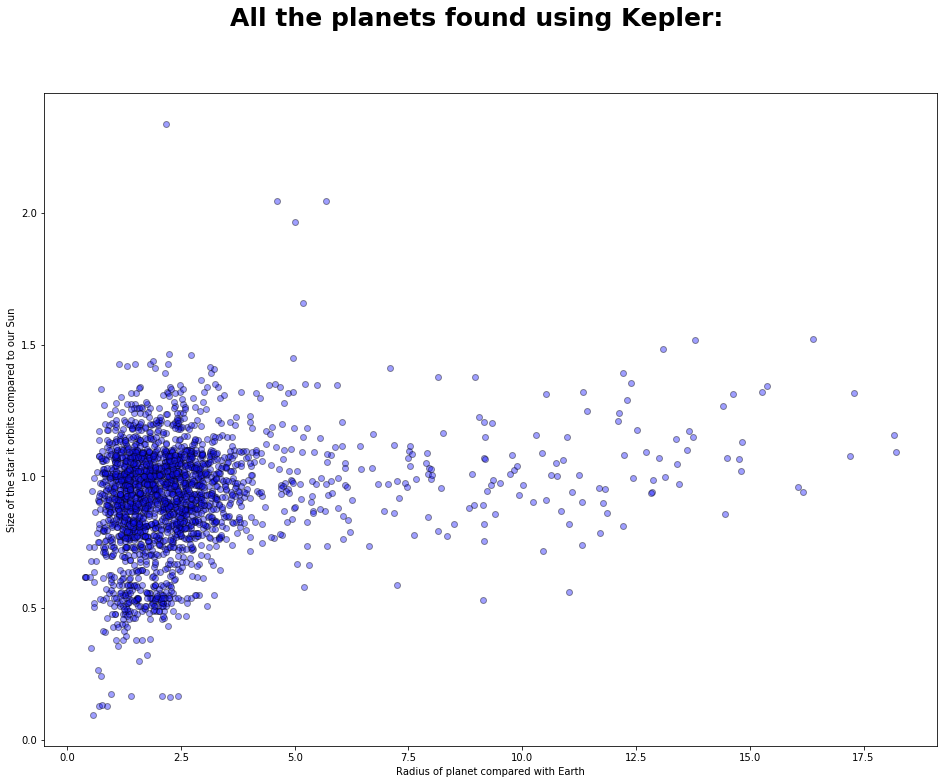

In [0]:
fig, ax = plt.subplots(1,1, figsize=(,12))
fig.subplots_adjust(hspace=1, wspace=-.03)
fig.suptitle('All the planets found using Kepler:', fontsize=25, fontweight='bold', va='top');

ax.scatter((planets_conf.loc[planets_conf['koi_prad'] <= 20]['koi_prad'])
           ,planets_conf.loc[planets_conf['koi_prad'] <= 20]['koi_smass'],
           c='#0f0fff', alpha=.4, edgecolors='#000000');
ax.set_xlabel('Radius of planet compared with Earth')
ax.set_ylabel('Size of the star it orbits compared to our Sun')

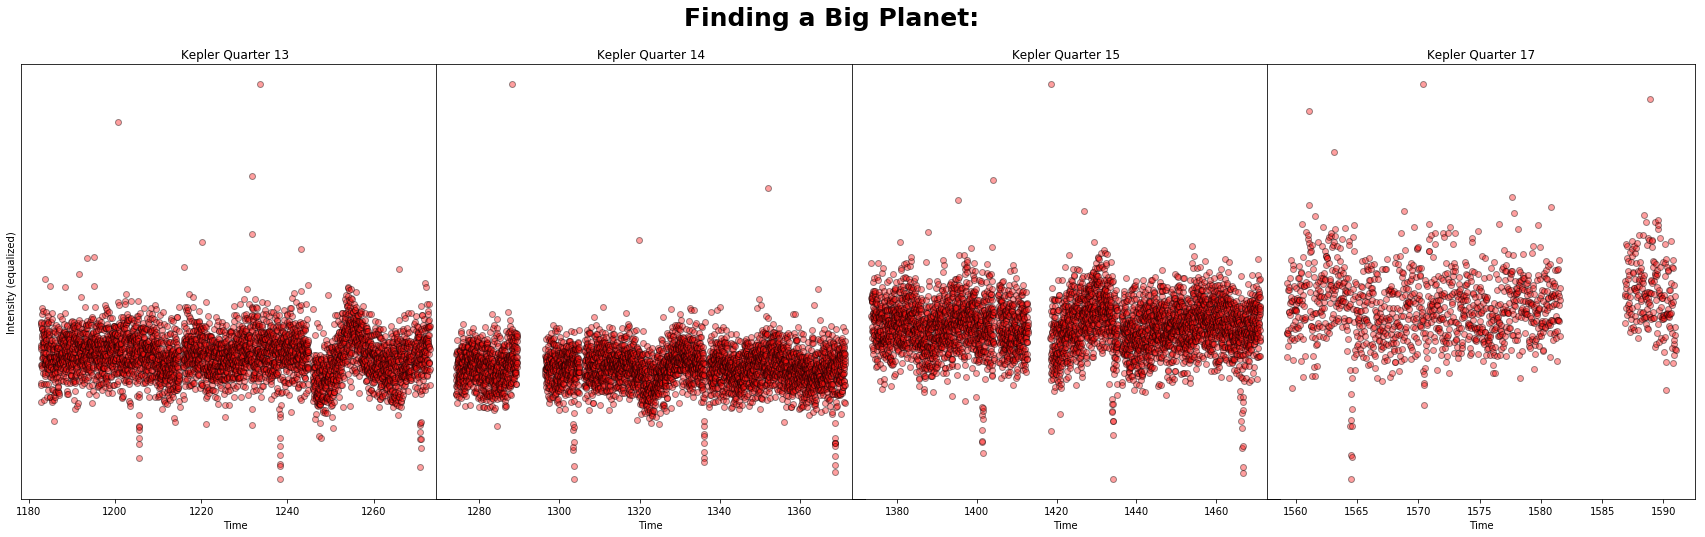

In [0]:
fig, ax = plt.subplots(1,4, figsize=(30,8))
fig.subplots_adjust(hspace=1, wspace=-.03)
dates = [13,14,15,17]

for i in range(4):
  ax[i].scatter(bpl_vars[i]['time'], bpl_vars[i]['pdscap_flux'],c='#ff0f0f', alpha=.4, edgecolors='#000000')
  ax[i].set_title('Kepler Quarter {}'.format(dates[i]))
  ax[i].set_yticks([])
  ax[i].set_xlabel('Time: Q{}'.format(dates))
  ax[0].set_ylabel('Intensity (equalized)')
fig.suptitle('Finding a Big Planet:', fontsize=25, fontweight='bold', va='top');

In [0]:
largest20.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,ra,dec,koi_kepmag
688,1026,11018648,K00759.01,Kepler-230 b,CONFIRMED,32.628830,194.10095,44.5801,6.3644,2071.8,...,1,5588.0,4.563,-0.30,0.796,0.846,NaN,285.71854,48.505859,15.082
667,994,10358759,K00738.01,Kepler-29 b,CONFIRMED,10.339292,170.38425,30.2064,4.0633,1450.2,...,1,5716.0,4.544,-0.04,0.872,0.970,NaN,298.34833,47.491230,15.282
668,995,10358759,K00738.02,Kepler-29 c,CONFIRMED,13.286891,172.12004,13.8538,4.3460,1274.9,...,2,5716.0,4.544,-0.04,0.872,0.970,NaN,298.34833,47.491230,15.282
1225,2059,5474613,K01599.02,Kepler-1659 b,CONFIRMED,13.616346,140.94897,1.5875,4.4130,384.4,...,2,5823.0,4.472,0.06,0.972,1.020,NaN,298.37384,40.618420,14.802
1023,1647,8564587,K01270.02,Kepler-57 c,CONFIRMED,11.609071,133.99432,1.5079,2.7570,517.6,...,2,5324.0,4.585,-0.04,0.791,0.884,NaN,293.64130,44.657040,14.809


In [0]:
smallest20.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_tce_plnt_num,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,ra,dec,koi_kepmag
2050,3882,6278762,K03158.02,Kepler-444 c,CONFIRMED,4.545878,131.52276,0.3425,1.7367,44.0,...,4,5032.0,4.683,-0.96,0.593,0.618,NaN,289.75229,41.634605,8.717
2051,3883,6278762,K03158.03,Kepler-444 d,CONFIRMED,6.189406,134.78672,0.2567,2.2112,47.5,...,2,5032.0,4.683,-0.96,0.593,0.618,NaN,289.75229,41.634605,8.717
2052,3884,6278762,K03158.04,Kepler-444 e,CONFIRMED,7.743476,135.09376,0.3471,2.7852,51.3,...,3,5032.0,4.683,-0.96,0.593,0.618,NaN,289.75229,41.634605,8.717
32,64,10187017,K00082.05,Kepler-102 b,CONFIRMED,5.286954,135.85194,0.4052,2.5910,43.0,...,5,4812.0,4.548,0.02,0.755,0.734,NaN,281.48273,47.208031,11.492
2053,3885,6278762,K03158.05,Kepler-444 f,CONFIRMED,9.740484,134.88007,0.0983,1.6909,75.6,...,1,5032.0,4.683,-0.96,0.593,0.618,NaN,289.75229,41.634605,8.717


In [0]:
big_lil

NameError: ignored

In [0]:
lpl_vars[0].columns

Index(['time', 'time_bjd', 'timecorr', 'cadenceno', 'sap_flus', 'sap_flux_err', 'sap_bkg', 'sap_bkg_err', 'pdscap_flux', 'pdscap_flux_err', 'sap_quality', 'psf_centr1', 'psf_centr1_err', 'psf_centr2', 'psf_centr2_err', 'mom_centr', 'mom_centr1_err', 'mom_centr2', 'mom_centr2_err', 'pos_corr1', 'pos_corr2'], dtype='object')

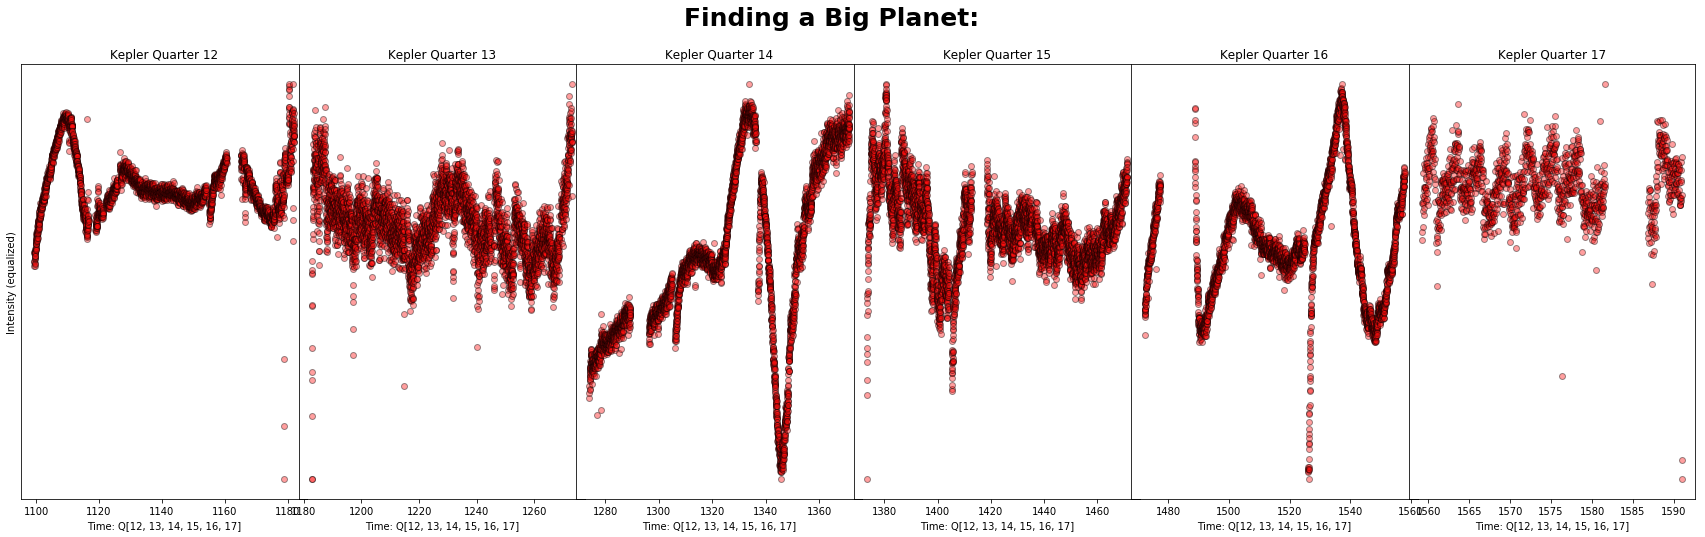

In [0]:
fig, ax = plt.subplots(1,6, figsize=(30,8))
fig.subplots_adjust(hspace=1, wspace=-.03)
dates = [12,13,14,15,16,17]

for i in range(6):
  ax[i].scatter(lpl_vars[i]['time'], lpl_vars[i]['pdscap_flux'],c='#ff0f0f', alpha=.4, edgecolors='#000000')
  ax[i].set_title('Kepler Quarter {}'.format(dates[i]))
  ax[i].set_yticks([])
  ax[i].set_xlabel('Time: Q{}'.format(dates))
  ax[0].set_ylabel('Intensity (equalized)')
fig.suptitle('Finding a Big Planet:', fontsize=25, fontweight='bold', va='top');

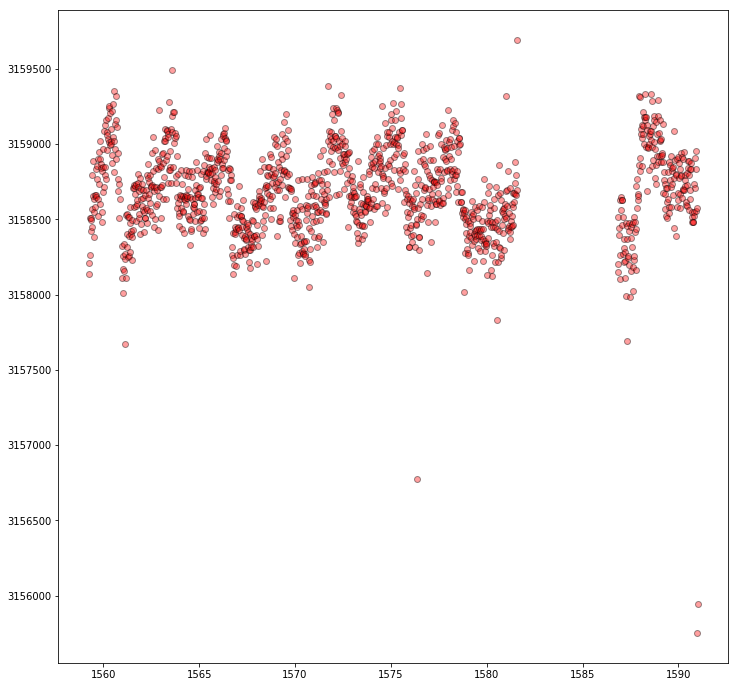

In [0]:
fig, ax = plt.subplots(1,1, figsize=(12,12))


plt.scatter(lp17light['time'], lp17light['pdscap_flux'],c='#ff0f0f', alpha=.4, edgecolors='#000000')

In [0]:
smallest20.loc[smallest20['kepid'] == 6278762][['kepid','kepler_name','koi_prad','koi_srad', 'koi_period']]

,kepid,kepler_name,koi_prad,koi_srad,koi_period
2050,6278762,Kepler-444 c,0.39,0.593,4.545878
2051,6278762,Kepler-444 d,0.40,0.593,6.189406
2052,6278762,Kepler-444 e,0.42,0.593,7.743476
2053,6278762,Kepler-444 f,0.51,0.593,9.740484


In [0]:
smallest20.columns

Index(['loc_rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_smet', 'koi_srad', 'koi_smass', 'koi_sage', 'ra', 'dec', 'koi_kepmag'], dtype='object')